In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Research/Project2022/DL-Arch/SpectrogramsDL.zip' .
!unzip '/content/SpectrogramsDL.zip' -d .
!rm '/content/SpectrogramsDL.zip'

In [ ]:
!cp '/content/drive/MyDrive/Research/Project2022/DL-Arch/SpectrogramsDL_DEAP.zip' .
!unzip '/content/SpectrogramsDL_DEAP.zip' -d .
!rm '/content/SpectrogramsDL_DEAP.zip'

In [ ]:
!cp '/content/drive/MyDrive/Research/Project2022/DL-Arch/SpectrogramsDL_amigos.zip' .
!unzip '/content/SpectrogramsDL_amigos.zip' -d .
!rm '/content/SpectrogramsDL_amigos.zip'

In [7]:
amigos = pd.read_csv('/content/drive/MyDrive/Research/Project2022/DL-Arch/Amigos_dataset_df.csv')
amigos

,x_col,y_col,Subject,film,channel
0,SpectrogramsDL_amigos/01/1/F7/watch_scipy.jpg,1.00,1,1,F7
1,SpectrogramsDL_amigos/01/1/F3/watch_scipy.jpg,1.00,1,1,F3
2,SpectrogramsDL_amigos/01/1/T7/watch_scipy.jpg,1.00,1,1,T7
3,SpectrogramsDL_amigos/01/1/P7/watch_scipy.jpg,1.00,1,1,P7
4,SpectrogramsDL_amigos/01/1/O1/watch_scipy.jpg,1.00,1,1,O1
...,...,...,...,...,...
7545,SpectrogramsDL_amigos/40/20/O2/watch_scipy.jpg,8.12,40,20,O2
7546,SpectrogramsDL_amigos/40/20/P8/watch_scipy.jpg,8.12,40,20,P8
7547,SpectrogramsDL_amigos/40/20/T8/watch_scipy.jpg,8.12,40,20,T8
7548,SpectrogramsDL_amigos/40/20/F4/watch_scipy.jpg,8.12,40,20,F4


In [8]:
deap = pd.read_csv('/content/drive/MyDrive/Research/Project2022/DL-Arch/deap_dataset_df.csv')
deap['Subject'] += 40
deap['film'] += 20
#deap['x_col'] = '/content/drive/MyDrive/Research/Project2022/' + deap['x_col']
deap.index += 7550
deap

,x_col,y_col,Subject,film,channel
7550,SpectrogramsDL_DEAP/01/1/Fz/watch_scipy.jpg,7.83,41,21,Fz
7551,SpectrogramsDL_DEAP/01/1/F3/watch_scipy.jpg,7.83,41,21,F3
7552,SpectrogramsDL_DEAP/01/1/F7/watch_scipy.jpg,7.83,41,21,F7
7553,SpectrogramsDL_DEAP/01/1/C3/watch_scipy.jpg,7.83,41,21,C3
7554,SpectrogramsDL_DEAP/01/1/T7/watch_scipy.jpg,7.83,41,21,T7
...,...,...,...,...,...
30585,SpectrogramsDL_DEAP/32/40/Cz/watch_scipy.jpg,1.88,72,60,Cz
30586,SpectrogramsDL_DEAP/32/40/C4/watch_scipy.jpg,1.88,72,60,C4
30587,SpectrogramsDL_DEAP/32/40/T8/watch_scipy.jpg,1.88,72,60,T8
30588,SpectrogramsDL_DEAP/32/40/F4/watch_scipy.jpg,1.88,72,60,F4


In [9]:
lab = pd.read_csv('/content/drive/MyDrive/Research/Project2022/DL-Arch/lab_dataset_df.csv')
lab['Subject'] += 72
lab['film'] += 60
lab.index += 30590
lab

,x_col,y_col,Subject,film,channel
30590,SpectrogramsDL/1/1/Fz/watch_scipy.jpg,10.0,73,61,Fz
30591,SpectrogramsDL/1/1/F3/watch_scipy.jpg,10.0,73,61,F3
30592,SpectrogramsDL/1/1/F7/watch_scipy.jpg,10.0,73,61,F7
30593,SpectrogramsDL/1/1/C3/watch_scipy.jpg,10.0,73,61,C3
30594,SpectrogramsDL/1/1/T7/watch_scipy.jpg,10.0,73,61,T7
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,2.0,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,2.0,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,2.0,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,2.0,84,68,F4


In [65]:
#data_all = deap
data_all = pd.concat([amigos, deap, lab], axis=0)
data_all

,x_col,y_col,Subject,film,channel
0,SpectrogramsDL_amigos/01/1/F7/watch_scipy.jpg,1.0,1,1,F7
1,SpectrogramsDL_amigos/01/1/F3/watch_scipy.jpg,1.0,1,1,F3
2,SpectrogramsDL_amigos/01/1/T7/watch_scipy.jpg,1.0,1,1,T7
3,SpectrogramsDL_amigos/01/1/P7/watch_scipy.jpg,1.0,1,1,P7
4,SpectrogramsDL_amigos/01/1/O1/watch_scipy.jpg,1.0,1,1,O1
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,2.0,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,2.0,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,2.0,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,2.0,84,68,F4


In [67]:
test = data_all[data_all['film'] > 56]
train = data_all[data_all['film'] < 57]
train

,x_col,y_col,Subject,film,channel
0,SpectrogramsDL_amigos/01/1/F7/watch_scipy.jpg,1.00,1,1,F7
1,SpectrogramsDL_amigos/01/1/F3/watch_scipy.jpg,1.00,1,1,F3
2,SpectrogramsDL_amigos/01/1/T7/watch_scipy.jpg,1.00,1,1,T7
3,SpectrogramsDL_amigos/01/1/P7/watch_scipy.jpg,1.00,1,1,P7
4,SpectrogramsDL_amigos/01/1/O1/watch_scipy.jpg,1.00,1,1,O1
...,...,...,...,...,...
30513,SpectrogramsDL_DEAP/32/36/Cz/watch_scipy.jpg,3.12,72,56,Cz
30514,SpectrogramsDL_DEAP/32/36/C4/watch_scipy.jpg,3.12,72,56,C4
30515,SpectrogramsDL_DEAP/32/36/T8/watch_scipy.jpg,3.12,72,56,T8
30516,SpectrogramsDL_DEAP/32/36/F4/watch_scipy.jpg,3.12,72,56,F4


In [68]:
test

,x_col,y_col,Subject,film,channel
8198,SpectrogramsDL_DEAP/01/37/Fz/watch_scipy.jpg,6.77,41,57,Fz
8199,SpectrogramsDL_DEAP/01/37/F3/watch_scipy.jpg,6.77,41,57,F3
8200,SpectrogramsDL_DEAP/01/37/F7/watch_scipy.jpg,6.77,41,57,F7
8201,SpectrogramsDL_DEAP/01/37/C3/watch_scipy.jpg,6.77,41,57,C3
8202,SpectrogramsDL_DEAP/01/37/T7/watch_scipy.jpg,6.77,41,57,T7
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,2.00,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,2.00,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,2.00,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,2.00,84,68,F4


In [ ]:
#df = pd.concat([amigos, deap, lab], axis=0)
#df

In [ ]:
#df.to_csv('all_dataset_df.csv', index=False)

In [ ]:
#info = df[['Subject', 'film', 'channel']]
#df = df.drop(['Subject', 'film', 'channel'], axis=1)
#df

In [ ]:
#info

In [ ]:
#train_datagen = ImageDataGenerator(rescale=1./255)


#train_generator = train_datagen.flow_from_dataframe(df, x_col='x_col',y_col='y_col', class_mode='raw', target_size=target_size)

In [ ]:
#train = pd.concat([amigos, deap], axis=0)
#train

In [ ]:
#train = pd.read_csv('train.csv')

In [ ]:
#lab = pd.read_csv('test.csv')

In [69]:
target_size = (512, 512)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
traingen =  train_datagen.flow_from_dataframe(train, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)

valgen =  test_datagen.flow_from_dataframe(test, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)
#test_data = val_datagen.flow_from_dataframe(lab, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)


Found 28286 validated image filenames.
Found 3996 validated image filenames.


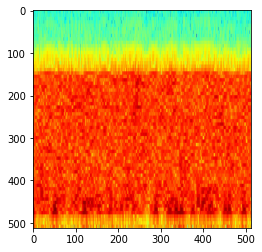

In [95]:
import matplotlib.pyplot as plt
x,y = traingen.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [71]:
from keras.models import Sequential
from keras import models
from keras.layers import Dense
from keras.layers import core, convolutional, pooling
from keras import layers

In [ ]:
def gen_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(1024, 1024, 3)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),        
      tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

In [72]:
def gen_model2():
    model = models.Sequential()
    model.add(convolutional.Convolution2D(16, 3, 3, input_shape=(512, 512, 3), activation='relu'))
    model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
    model.add(convolutional.Convolution2D(32, 3, 3, activation='relu'))
    model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
    model.add(convolutional.Convolution2D(64, 3, 3, activation='relu'))
    model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
    model.add(core.Flatten())
    model.add(core.Dense(500, activation='relu'))
    model.add(core.Dropout(.5))
    model.add(core.Dense(100, activation='relu'))
    model.add(core.Dropout(.25))
    model.add(core.Dense(20, activation='relu'))
    model.add(core.Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-04), loss='mean_squared_error', metrics=['mae', 'mse'])
    return model

In [82]:
def gen_model3():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(512,512, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(3, activation='softmax'))
  model.add(core.Dense(1))
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-04), loss='mean_squared_error', metrics=['mae', 'mape', 'mse'])
  return model

In [16]:
def gen_model4():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(512,512, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(3, activation='softmax'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-04), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [74]:
model = gen_model3()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
!pip install -q pyyaml h5py

In [79]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Research/Project2022/Models/DL3/a',
    save_best_only=True)

In [ ]:
history = model.fit(traingen, validation_data=valgen, epochs=500, callbacks=[checkpoint_callback])

In [ ]:
model.predict(valgen)

In [83]:
data_all = pd.concat([amigos, deap, lab], axis=0)
data_all

,x_col,y_col,Subject,film,channel
0,SpectrogramsDL_amigos/01/1/F7/watch_scipy.jpg,1.0,1,1,F7
1,SpectrogramsDL_amigos/01/1/F3/watch_scipy.jpg,1.0,1,1,F3
2,SpectrogramsDL_amigos/01/1/T7/watch_scipy.jpg,1.0,1,1,T7
3,SpectrogramsDL_amigos/01/1/P7/watch_scipy.jpg,1.0,1,1,P7
4,SpectrogramsDL_amigos/01/1/O1/watch_scipy.jpg,1.0,1,1,O1
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,2.0,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,2.0,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,2.0,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,2.0,84,68,F4


In [90]:
train_fz = data_all[(data_all['film'] < 59) & (data_all['channel'] == 'Fz')]
train_fz

,x_col,y_col,Subject,film,channel
7550,SpectrogramsDL_DEAP/01/1/Fz/watch_scipy.jpg,7.83,41,21,Fz
7568,SpectrogramsDL_DEAP/01/2/Fz/watch_scipy.jpg,8.47,41,22,Fz
7586,SpectrogramsDL_DEAP/01/3/Fz/watch_scipy.jpg,7.08,41,23,Fz
7604,SpectrogramsDL_DEAP/01/4/Fz/watch_scipy.jpg,8.06,41,24,Fz
7622,SpectrogramsDL_DEAP/01/5/Fz/watch_scipy.jpg,6.05,41,25,Fz
...,...,...,...,...,...
30464,SpectrogramsDL_DEAP/32/34/Fz/watch_scipy.jpg,1.26,72,54,Fz
30482,SpectrogramsDL_DEAP/32/35/Fz/watch_scipy.jpg,1.00,72,55,Fz
30500,SpectrogramsDL_DEAP/32/36/Fz/watch_scipy.jpg,3.12,72,56,Fz
30518,SpectrogramsDL_DEAP/32/37/Fz/watch_scipy.jpg,1.04,72,57,Fz


In [91]:
test_fz = data_all[(data_all['film'] > 58) & (data_all['channel'] == 'Fz')]
test_fz

,x_col,y_col,Subject,film,channel
8234,SpectrogramsDL_DEAP/01/39/Fz/watch_scipy.jpg,6.15,41,59,Fz
8252,SpectrogramsDL_DEAP/01/40/Fz/watch_scipy.jpg,5.97,41,60,Fz
8954,SpectrogramsDL_DEAP/02/39/Fz/watch_scipy.jpg,1.00,42,59,Fz
8972,SpectrogramsDL_DEAP/02/40/Fz/watch_scipy.jpg,6.53,42,60,Fz
9674,SpectrogramsDL_DEAP/03/39/Fz/watch_scipy.jpg,4.62,43,59,Fz
...,...,...,...,...,...
32192,SpectrogramsDL/12/4/Fz/watch_scipy.jpg,9.00,84,64,Fz
32210,SpectrogramsDL/12/5/Fz/watch_scipy.jpg,10.00,84,65,Fz
32228,SpectrogramsDL/12/6/Fz/watch_scipy.jpg,7.00,84,66,Fz
32246,SpectrogramsDL/12/7/Fz/watch_scipy.jpg,8.00,84,67,Fz


In [93]:
target_size = (512, 512)
train_datagen_fz = ImageDataGenerator(rescale=1./255)
test_datagen_fz = ImageDataGenerator(rescale=1./255)
val_datagen_fz = ImageDataGenerator(rescale=1./255)

In [94]:
traingen_fz =  train_datagen.flow_from_dataframe(train_fz, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)

valgen_fz =  test_datagen.flow_from_dataframe(test_fz, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)

Found 1216 validated image filenames.
Found 158 validated image filenames.


In [96]:
model_fz = gen_model3()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [98]:
checkpoint_callback_chan = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Research/Project2022/Models/DL3/Fz',
    save_best_only=True)

In [ ]:
history_fz = model_fz.fit(traingen_fz , validation_data=valgen_fz, epochs=500, callbacks=[checkpoint_callback_chan])

In [ ]:
models = ['MLPRegressor']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(1) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(1) for j in range(3) for k in range(2)]),
]

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)


In [ ]:
data_all = pd.concat([amigos, deap, lab], axis=0)
data_all

,x_col,y_col,Subject,film,channel
0,SpectrogramsDL_amigos/01/1/F7/watch_scipy.jpg,1.0,1,1,F7
1,SpectrogramsDL_amigos/01/1/F3/watch_scipy.jpg,1.0,1,1,F3
2,SpectrogramsDL_amigos/01/1/T7/watch_scipy.jpg,1.0,1,1,T7
3,SpectrogramsDL_amigos/01/1/P7/watch_scipy.jpg,1.0,1,1,P7
4,SpectrogramsDL_amigos/01/1/O1/watch_scipy.jpg,1.0,1,1,O1
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,2.0,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,2.0,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,2.0,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,2.0,84,68,F4


In [ ]:
lab

,x_col,y_col,Subject,film,channel
30590,SpectrogramsDL/1/1/Fz/watch_scipy.jpg,10.0,73,61,Fz
30591,SpectrogramsDL/1/1/F3/watch_scipy.jpg,10.0,73,61,F3
30592,SpectrogramsDL/1/1/F7/watch_scipy.jpg,10.0,73,61,F7
30593,SpectrogramsDL/1/1/C3/watch_scipy.jpg,10.0,73,61,C3
30594,SpectrogramsDL/1/1/T7/watch_scipy.jpg,10.0,73,61,T7
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,2.0,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,2.0,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,2.0,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,2.0,84,68,F4


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
#qt = QuantileTransformer()
#data_all['y_col'] = qt.fit_transform(np.array(data_all['y_col']).reshape(-1, 1) )
#data_all

,x_col,y_col,Subject,film,channel
0,SpectrogramsDL_amigos/01/1/F7/watch_scipy.jpg,0.000000,1,1,F7
1,SpectrogramsDL_amigos/01/1/F3/watch_scipy.jpg,0.000000,1,1,F3
2,SpectrogramsDL_amigos/01/1/T7/watch_scipy.jpg,0.000000,1,1,T7
3,SpectrogramsDL_amigos/01/1/P7/watch_scipy.jpg,0.000000,1,1,P7
4,SpectrogramsDL_amigos/01/1/O1/watch_scipy.jpg,0.000000,1,1,O1
...,...,...,...,...,...
32277,SpectrogramsDL/12/8/Cz/watch_scipy.jpg,0.111612,84,68,Cz
32278,SpectrogramsDL/12/8/C4/watch_scipy.jpg,0.111612,84,68,C4
32279,SpectrogramsDL/12/8/T8/watch_scipy.jpg,0.111612,84,68,T8
32280,SpectrogramsDL/12/8/F4/watch_scipy.jpg,0.111612,84,68,F4


In [ ]:
result = pd.DataFrame()
grid_res = []
n_films = 68
n_subjects = 84
target_size = (1024, 1024)
for film in tqdm_notebook(range(61, n_films + 1)):
    df = pd.DataFrame(np.random.randn(1, 1 * 3 * 2), columns=columns)
    X_test = data_all[data_all['film'] == film].reset_index(drop=True)
    X_train = data_all[data_all['film'] != film].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = np.array(X_train['y_col'])
    y_test = np.array(X_test['y_col'])
    y_test_inv = qt.inverse_transform(np.array(X_test['y_col']).reshape(-1, 1))
    train_film = X_train['film']
    train_subj = X_train['Subject']
    test_film = X_test['film']
    test_subj = X_test['Subject']

    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)    
    traingen =  train_datagen.flow_from_dataframe(X_train, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)

    valgen =  test_datagen.flow_from_dataframe(X_test, x_col='x_col', y_col='y_col', class_mode='raw', target_size=target_size)

    callbacks = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', min_delta=0, patience=0, verbose=0,
      mode='auto', baseline=None, restore_best_weights=True
    )
    model = gen_model2()
    history = model.fit(traingen, validation_data=valgen, epochs=10, steps_per_epoch=200, callbacks=[callbacks])
    y_pred = model.predict(valgen)
    preds = qt.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('MLPRegressor', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('MLPRegressor', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('MLPRegressor', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    
    pred = [[0 for j in range(n_films)] for i in range(n_subjects)]
    num_chans = [[0 for j in range(n_films)] for i in range(n_subjects)]
    labels = [[0 for j in range(n_films)] for i in range(n_subjects)]
    lbl = [[0 for j in range(n_films)] for i in range(n_subjects)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += preds[i]
        num_chans[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += 1
        labels[np.array(test_subj)[i] - 1][np.array(test_film)[i] - 1] += y_test_inv[i]
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(n_films):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    for [l, p] in zip(lbl, predicted):
      print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    df[('MLPRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('MLPRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('MLPRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    result = pd.concat([result, df], axis=0)